1. Organisasi Sistem File:  
Teori tree dapat digunakan untuk mengorganisasi data dari sebuah sitem, di mana direktori diwakili sebagai cabang, dan file diwakili sebagai daun. Ini berguna untuk pengambilan dan penyimpanan file.

Direktori file1.txt: Root -> Documents -> file1.txt
Direktori image1.jpg: Root -> Pictures -> image1.jpg
Direktori video2.3gp: Root -> Homework -> video2.3gp


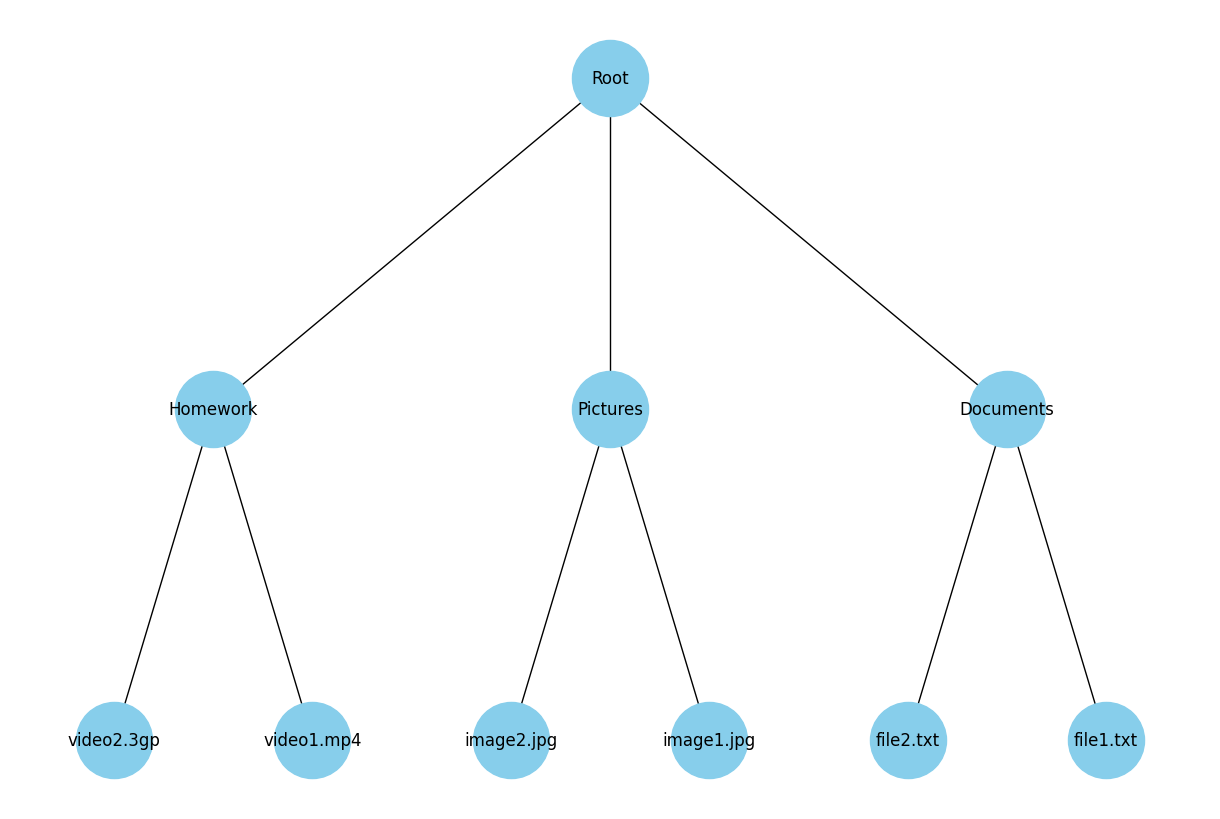

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.parent = None

    def add_child(self, child):
        self.children.append(child)
        child.parent = self

# Membuat sebuah tree
root = TreeNode("Root")
documents = TreeNode("Documents")
pictures = TreeNode("Pictures")
videos = TreeNode("Homework")
file1 = TreeNode("file1.txt")
file2 = TreeNode("file2.txt")
image1 = TreeNode("image1.jpg")
image2 = TreeNode("image2.jpg")
video1 = TreeNode("video1.mp4")
video2 = TreeNode("video2.3gp")

# Menambahkan direktori dan file
root.add_child(documents)
root.add_child(pictures)
root.add_child(videos)
documents.add_child(file1)
documents.add_child(file2)
pictures.add_child(image1)
pictures.add_child(image2)
videos.add_child(video1)
videos.add_child(video2)

# Mencari direktori dari sebuah file
def traverse(node):
    path = []
    while node:
        path.append(node.name)
        node = node.parent
    return " -> ".join(reversed(path))

print("Direktori file1.txt:", traverse(file1))  # Output: Root -> Documents -> file1.txt
print("Direktori image1.jpg:", traverse(image1))  # Output: Root -> Pictures -> image1.jpg
print("Direktori video2.3gp:", traverse(video2))  # Output: Root -> Homework -> video2.3gp

# Visualisasi tree
def add_edges(graph, node, pos={}, x=0, y=0, layer=1):
    if node is not None:
        pos[node.name] = (x, y)
        for child in node.children:
            graph.add_edge(node.name, child.name)
            pos = add_edges(graph, child, pos=pos, x=x + (len(node.children) - 1) * (0.5 / layer), y=y-1, layer=layer+1)
            x -= 1 / layer
    return pos

def visualize_tree(root):
    graph = nx.DiGraph()
    pos = add_edges(graph, root)
    labels = {n: n for n in graph.nodes()}
    
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, labels=labels, with_labels=True, arrows=False, node_size=3000, node_color="skyblue", font_size=12, font_color="black")
    plt.show()

visualize_tree(root)

2. Menghitung Diameter Pohon Biner:  
Digunakan untuk Hitung diameter (panjang jalur terpanjang antara dua daun) dari sebuah pohon biner.

Diameter dari tree: 3


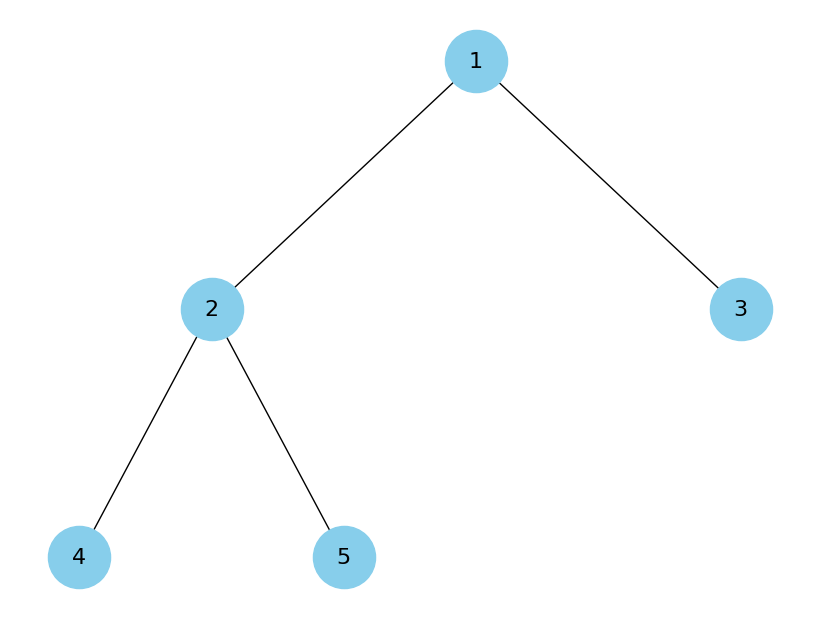

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

def diameter(root):
    def height_and_diameter(node):
        if not node:
            return 0, 0
        left_height, left_diameter = height_and_diameter(node.left)
        right_height, right_diameter = height_and_diameter(node.right)
        current_height = max(left_height, right_height) + 1
        current_diameter = max(left_height + right_height, left_diameter, right_diameter)
        return current_height, current_diameter

    return height_and_diameter(root)[1]

def add_edges(graph, node, pos={}, x=0, y=0, layer=1):
    if node is not None:
        pos[node.val] = (x, y)
        if node.left:
            graph.add_edge(node.val, node.left.val)
            l = x - 1 / layer
            pos = add_edges(graph, node.left, pos=pos, x=l, y=y-1, layer=layer+1)
        if node.right:
            graph.add_edge(node.val, node.right.val)
            r = x + 1 / layer
            pos = add_edges(graph, node.right, pos=pos, x=r, y=y-1, layer=layer+1)
    return pos

def visualize_tree(root):
    graph = nx.DiGraph()
    pos = add_edges(graph, root)
    labels = {n: n for n in graph.nodes()}
    
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, labels=labels, with_labels=True, arrows=False, node_size=2000, node_color="skyblue", font_size=16, font_color="black")
    plt.show()

# Membuat tree
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)

# Mengitung diameter dari tree
print(f"Diameter dari tree: {diameter(root)}")

# Visualisasi tree
visualize_tree(root)